### Linear Regression - Medical Insurence

In [1]:
import pandas as pd
import numpy as np

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import shapiro, kstest, normaltest,skew

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json

import warnings
warnings.filterwarnings('ignore')

### 1. PRoblem Statement

### 2. Data Gathering

In [3]:
dataset = pd.read_csv(r'data\medical_insurance.csv')
dataset
list(dataset['children'].unique())

[0, 1, 3, 2, 5, 4]

In [2]:
df = pd.read_csv('medical_insurance.csv')
df

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### 3. EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 3.1 age

In [4]:
df['age']

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

<Axes: xlabel='age', ylabel='Density'>

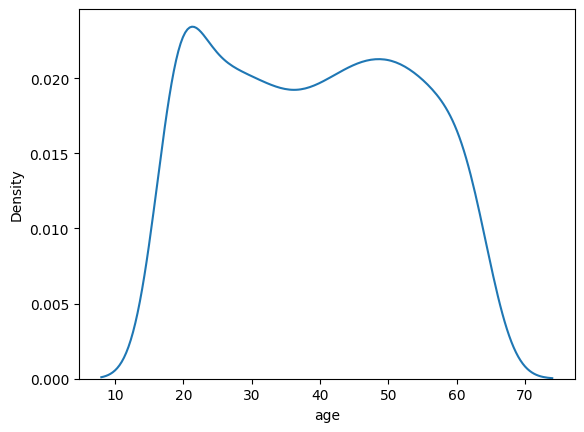

In [5]:
sns.kdeplot(df.age)

### 3.2 gender

In [6]:
df['gender']

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: gender, Length: 1338, dtype: object

In [7]:
df['gender'].value_counts()

gender
male      676
female    662
Name: count, dtype: int64

In [8]:
df['gender'].replace({'male':1, 'female':0},inplace = True)

In [9]:
df

,age,gender,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


### 3.3 bmi

In [10]:
df.bmi

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64

<Axes: >

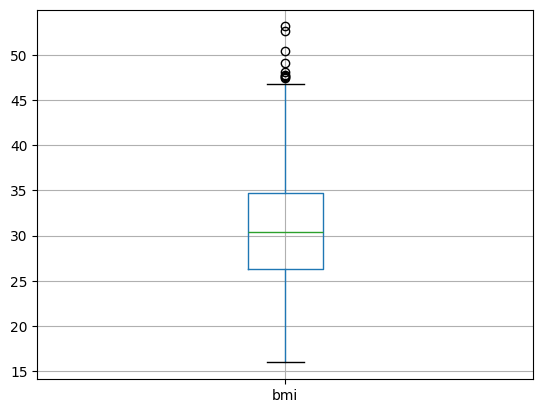

In [11]:
df[['bmi']].boxplot()

<Axes: xlabel='bmi', ylabel='Density'>

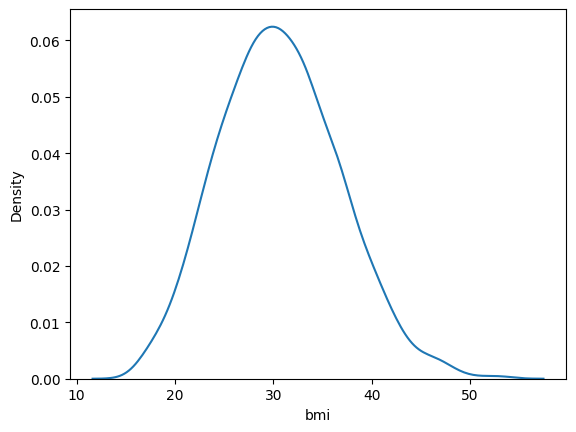

In [12]:
sns.kdeplot(df.bmi)

In [13]:
df.bmi.skew()

0.2840471105987448

### 4. smoker

In [14]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [15]:
df['smoker'].replace({'no':0, 'yes':1}, inplace = True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


### 5. region    

In [17]:
df['region']

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object

In [18]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [19]:
df1 = pd.get_dummies(df,dtype = int )
df1.head(3)

,age,gender,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.90,0,1,16884.9240,0,0,0,1
1,18,1,33.77,1,0,1725.5523,0,0,1,0
2,28,1,33.00,3,0,4449.4620,0,0,1,0


In [20]:
df1.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')

### Model Training

In [21]:
x = df1.drop('charges', axis = 1)
y = df1.charges

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [22]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)
lin_reg_model

LinearRegression()

### Training Data Evaluation

In [23]:
y_pred_train = lin_reg_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :", mae)

r_squared = r2_score(y_train, y_pred_train)
print("R-Squared :",r_squared)

MSE : 36100283.8698313
RMSE: 6008.351177305743
MAE : 4138.842762471064
R-Squared : 0.7520187377309014


In [24]:
y_pred = lin_reg_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :", mae)

r_squared = r2_score(y_test, y_pred)
print("R-Squared :",r_squared)

MSE : 38304871.34868593
RMSE: 6189.092934242136
MAE : 4279.860834219365
R-Squared : 0.7449415564623686


In [29]:
lin_reg_model

LinearRegression()

In [30]:
with open("linear_regression_model.pkl", 'wb') as f:
    pickle.dump(lin_reg_model,f)

In [27]:
df

,age,gender,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [26]:
df1

,age,gender,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


In [34]:
column_data = {
                "gender": {'male':1, 'female':0},
                "smoker" : {'yes':1, 'no':0}
                }
with open("column_data.json", 'w') as f:
    json.dump(column_data,f)